In [33]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Match Data

In [34]:
# I don't want any of the challenger or future match data, which is why I specify the first digit of the year.
matches_files = glob.glob('../Resources/tennis_atp-master/atp_matches_[12]*')

In [35]:
matches_list = [pd.read_csv(matches_file, parse_dates=['tourney_date']) for matches_file in matches_files]

In [36]:
matches = pd.concat(matches_list, sort=False)

In [37]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [38]:
matches_winners = matches[['tourney_id', 'match_num', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level', 'tourney_date',
                           'winner_id', 'winner_name', 'loser_id', 'loser_name',
                           'winner_seed', 'winner_entry', 'loser_seed', 'loser_entry',
                           'score', 'best_of', 'round', 'minutes',
                           'w_ace', 'w_df', 'w_svpt', 'l_ace', 'l_df', 'l_svpt',
                           'w_1stIn', 'w_1stWon', 'w_2ndWon', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
                           'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
                           'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
                           'winner_ht', 'loser_ht']].copy()

In [39]:
matches_losers = matches[['tourney_id', 'match_num', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level', 'tourney_date',
                           'loser_id', 'loser_name', 'winner_id', 'winner_name',
                           'loser_seed', 'loser_entry', 'winner_seed', 'winner_entry',
                           'score', 'best_of', 'round', 'minutes',
                           'l_ace', 'l_df', 'l_svpt', 'w_ace', 'w_df', 'w_svpt',
                           'l_1stIn', 'l_1stWon', 'l_2ndWon', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
                           'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
                           'loser_rank', 'loser_rank_points', 'winner_rank', 'winner_rank_points',
                           'loser_ht', 'winner_ht']].copy()

In [40]:
renamed_columns = (['tournament_id', 'match_id', 'tournament_name',
                    'surface', 'draw_size', 'tournament_level', 'tournament_date',
                    'player_id', 'player_name', 'opponent_id', 'opponent_name',
                    'player_seed', 'player_entry', 'opponent_seed', 'opponent_entry',
                    'score', 'best_of', 'round_of', 'minutes',
                    'aces', 'double_faults', 'service_points',
                    'opponent_aces', 'opponent_double_faults', 'opponent_service_points',
                    'first_serves', 'first_serves_won', 'second_serves_won',
                    'opponent_first_serves', 'opponent_first_serves_won', 'opponent_second_serves_won',
                    'service_games', 'break_points_saved', 'break_points_faced',
                    'opponent_service_games', 'opponent_break_points_saved', 'opponent_break_points_faced',
                    'player_rank', 'player_ranking_points', 'opponent_rank', 'opponent_ranking_points',
                    'player_height', 'opponent_height'])

matches_winners.columns = renamed_columns
matches_losers.columns = renamed_columns

In [41]:
matches_winners['result'] = 'W'
matches_winners['result_value'] = 1

matches_losers['result'] = 'L'
matches_losers['result_value'] = 0

In [42]:
matches = pd.concat([matches_winners, matches_losers])
matches.set_index(['player_id', 'tournament_id', 'match_id'], inplace=True)

## Data Cleaning

In [43]:
# Corrections to errant data here
# 1. 1991 Tokyo Outdoor tournament has an impossible value for Jim Courier's break point values.
#    Fix: An analysis of the score shows that the values are offset by 4. These are corrected.
# Courier
matches.loc[(101793, '1991-329', 54), 'break_points_faced'] = 4.
matches.loc[(101793, '1991-329', 54), 'break_points_saved'] = 0.
# Courier
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_faced'] = 4.
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_saved'] = 0.
# 2. 1991 Tokyo Outdoor tournament has an impossible value for Ivan Lendl's break point values.
#    Fix: The score has too many possibilities to narrow it down, so I will set the break points to NaN to avoid
#    propogating the errors any farther down the pipeline.
# Lendl
matches.loc[(100656, '1991-329', 55), 'break_points_faced'] = np.nan
matches.loc[(100656, '1991-329', 55), 'break_points_saved'] = np.nan
# Edberg
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_faced'] = np.nan
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_saved'] = np.nan

# Lendl must have distracted stat taker, as these are the only two individual instances of mistakes in the dataset.

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [44]:
# 3. The 2003 Madrid Masters has many instances where the service points won column 
#    exceeds the total service points played. All instances of service points
#    played and won are set to NaN for this tournament.
# 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won'

madrid_2003_matches = matches.query('tournament_id == \'2003-1536\'').index
matches.loc[madrid_2003_matches, 'service_points'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'second_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_service_points'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_second_serves_won'] = np.nan

In [45]:
long_long_matches = matches.query('tournament_id == \'2016-M001\' and match_id == 294 \
                                or tournament_id == \'2017-0308\' and match_id == 297').index
matches.loc[long_long_matches, 'minutes'] = np.nan

## Feature Generation

In [46]:
top_100_players = pd.read_pickle('../Resources/tennis_clean/atp_top_100_players.pkl')

In [47]:
matches = matches.reset_index() \
    .merge(top_100_players[['best_rank', 'birthdate']], how='left', on='player_id') \
    .set_index(['player_id', 'tournament_id', 'match_id'])

In [48]:
matches = matches.reset_index() \
    .merge(top_100_players[['best_rank', 'birthdate']], how='left',
           left_on='opponent_id', right_on='player_id', suffixes=[None, '_opponent']) \
    .set_index(['player_id', 'tournament_id', 'match_id'])

In [49]:
matches = matches.rename(columns={'best_rank': 'player_best_rank',
                                  'birthdate': 'player_birthdate',
                                  'best_rank_opponent': 'opponent_best_rank',
                                  'birthdate_opponent': 'opponent_birthdate'})

In [50]:
matches['player_age'] = (matches.tournament_date - matches.player_birthdate).dt.days
matches['opponent_age'] = (matches.tournament_date - matches.opponent_birthdate).dt.days

In [51]:
matches.shape

(358978, 48)

(0.5992635371067814, 0.6, 0.0, 1.0)

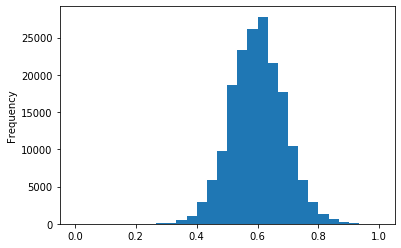

In [52]:
matches['first_serve_percentage'] = matches.first_serves / matches.service_points
matches['opponent_first_serve_percentage'] = matches.opponent_first_serves / matches.opponent_service_points

matches.first_serve_percentage.plot(kind='hist', bins=30)

(matches.first_serve_percentage.mean(), matches.first_serve_percentage.median(),
 matches.first_serve_percentage.min(), matches.first_serve_percentage.max())

(0.7102802816335104, 0.7142857142857143, 0.0, 1.0)

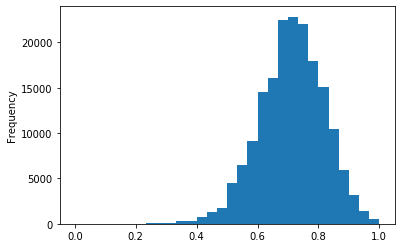

In [53]:
matches['first_serves_won_percentage'] = matches.first_serves_won / matches.first_serves
matches['opponent_first_serves_won_percentage'] = matches.opponent_first_serves_won / matches.opponent_first_serves

matches.first_serves_won_percentage.plot(kind='hist', bins=30)

(matches.first_serves_won_percentage.mean(), matches.first_serves_won_percentage.median(),
matches.first_serves_won_percentage.min(), matches.first_serves_won_percentage.max())

In [54]:
matches['second_serves'] = (matches.service_points - matches.first_serves)
matches['opponent_second_serves'] = (matches.opponent_service_points - matches.opponent_first_serves)

(0.5050500719702564, 0.5, 0.0, 1.0)

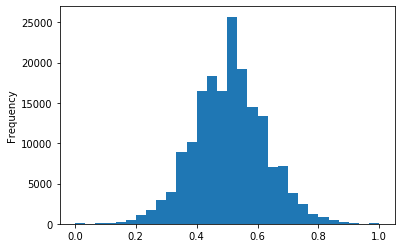

In [55]:
matches['second_serves_won_percentage'] = matches.second_serves_won / matches.second_serves
matches['opponent_second_serves_won_percentage'] = (matches.opponent_second_serves_won / 
                                                    matches.opponent_second_serves)

matches.second_serves_won_percentage.plot(kind='hist', bins=30)

(matches.second_serves_won_percentage.mean(), matches.second_serves_won_percentage.median(),
matches.second_serves_won_percentage.min(), matches.second_serves_won_percentage.max())

(0.5777067531508088, 0.6, 0.0, 1.0)

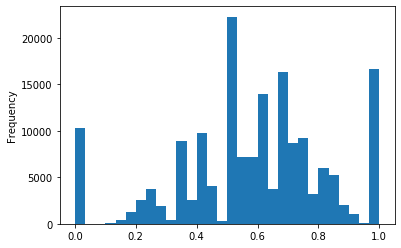

In [56]:
matches['break_points_saved_percentage'] = (matches.break_points_saved / matches.break_points_faced)
matches['opponent_break_points_saved_percentage'] = (matches.opponent_break_points_saved / 
                                                    matches.opponent_break_points_faced)

matches.break_points_saved_percentage.plot(kind='hist', bins=30)

# Initially two data points resulted in a negative percentage, and were corrected. 
(matches.break_points_saved_percentage.mean(), matches.break_points_saved_percentage.median(),
 matches.break_points_saved_percentage.min(), matches.break_points_saved_percentage.max())

(0.42229324684921615, 0.4, 0.0, 1.0)

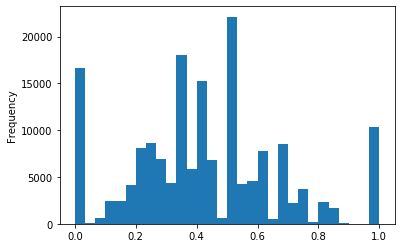

In [57]:
matches['break_points_won'] = matches.opponent_break_points_faced - matches.opponent_break_points_saved
matches['opponent_break_points_won'] = matches.break_points_faced - matches.break_points_saved

matches['break_points_won_percentage'] = (matches.break_points_won / 
                                          matches.opponent_break_points_faced)
matches['opponent_break_points_won_percentage'] = (matches.opponent_break_points_won / 
                                                   matches.break_points_faced)

matches.break_points_won_percentage.plot(kind='hist', bins=30)

# Initially two data points resulted in a negative percentage, and were corrected. 
(matches.break_points_won_percentage.mean(), matches.break_points_won_percentage.median(),
 matches.break_points_won_percentage.min(), matches.break_points_won_percentage.max())

(0.6265349469900003, 0.6285714285714286, 0.0, 1.0)

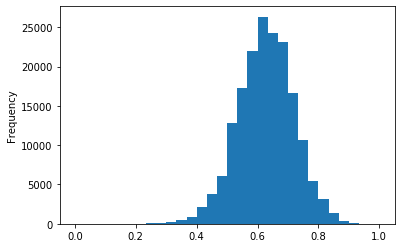

In [58]:
matches['service_points_won'] = matches.first_serves_won + matches.second_serves_won
matches['service_points_won_percentage'] = matches.service_points_won / matches.service_points

matches['opponent_service_points_won'] = (matches.opponent_first_serves_won + 
                                          matches.opponent_second_serves_won)
matches['opponent_service_points_won_percentage'] = (matches.opponent_service_points_won / 
                                                     matches.opponent_service_points)

matches.service_points_won_percentage.plot(kind='hist', bins=30)

(matches.service_points_won_percentage.mean(), matches.service_points_won_percentage.median(),
 matches.service_points_won_percentage.min(), matches.service_points_won_percentage.max())

(158.92997552695982, 148.0, 1.0, 980.0)

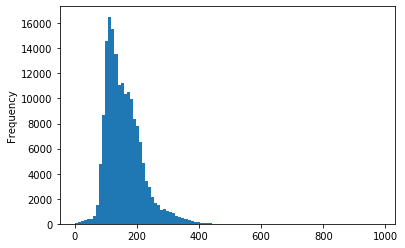

In [59]:
matches['points'] = matches.service_points + matches.opponent_service_points

matches.points.plot(kind='hist', bins=100)

matches.points.mean(), matches.points.median(), matches.points.min(), matches.points.max() 

(79.46498776347991, 74.0, 0.0, 491.0)

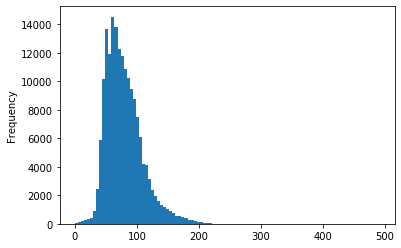

In [60]:
matches['return_points'] = matches.points - matches.service_points
matches['opponent_return_points'] = matches.points - matches.opponent_service_points

matches.return_points.plot(kind='hist', bins=100)

(matches.return_points.mean(), matches.return_points.median(),
matches.return_points.min(), matches.return_points.max())

(0.37346505301035116, 0.37142857142857144, 0.0, 1.0)

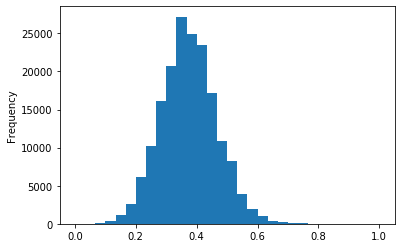

In [61]:
matches['return_points_won'] = matches.return_points - matches.opponent_service_points_won
matches['return_points_won_percentage'] = matches.return_points_won / matches.return_points

matches['opponent_return_points_won'] = matches.opponent_return_points - matches.service_points_won
matches['opponent_return_points_won_percentage'] = (matches.opponent_return_points_won / 
                                                    matches.opponent_return_points)

matches.return_points_won_percentage.plot(kind='hist', bins=30)

(matches.return_points_won_percentage.mean(), matches.return_points_won_percentage.median(),
matches.return_points_won_percentage.min(), matches.return_points_won_percentage.max())

(0.2897197183669043, 0.2897197183669043, 0.0, 1.0)

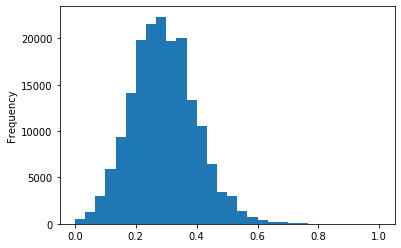

In [62]:
matches['first_serve_return_points_won'] = (matches.opponent_first_serves - 
                                            matches.opponent_first_serves_won)
matches['first_serve_return_points_won_percentage'] = (matches.first_serve_return_points_won / 
                                                       matches.opponent_first_serves)

matches['opponent_first_serve_return_points_won'] = (matches.first_serves - matches.first_serves_won)
matches['opponent_first_serve_return_points_won_percentage'] = (matches.opponent_first_serve_return_points_won / 
                                                                matches.first_serves)


matches.first_serve_return_points_won_percentage.plot(kind='hist', bins=30)

(matches.first_serve_return_points_won_percentage.mean(), matches.first_serve_return_points_won_percentage.mean(),
matches.first_serve_return_points_won_percentage.min(), matches.first_serve_return_points_won_percentage.max())

(0.4949499280293709, 0.0, 1.0)

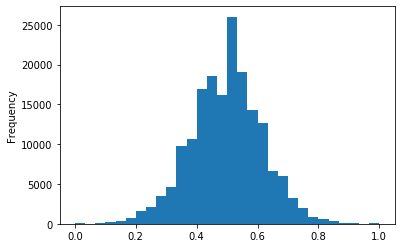

In [63]:
matches['second_serve_return_points_won'] = (matches.opponent_service_points - 
                                             matches.opponent_first_serves - 
                                             matches.opponent_second_serves_won)
matches['second_serve_return_points_won_percentage'] = (matches.second_serve_return_points_won / 
                                                        (matches.opponent_service_points - 
                                                         matches.opponent_first_serves))

matches['opponent_second_serve_return_points_won'] = (matches.service_points - 
                                                      matches.first_serves - 
                                                      matches.second_serves_won)
# loooong variable name alert
matches['opponent_second_serve_return_points_won_percentage'] = (matches.opponent_second_serve_return_points_won / 
                                                                 (matches.service_points - 
                                                                  matches.first_serves))


matches.second_serve_return_points_won_percentage.plot(kind='hist', bins=30)
matches.second_serve_return_points_won_percentage.mean(), matches.second_serve_return_points_won_percentage.min(), matches.second_serve_return_points_won_percentage.max()

(0.49999999999978484, 0.0, 1.0)

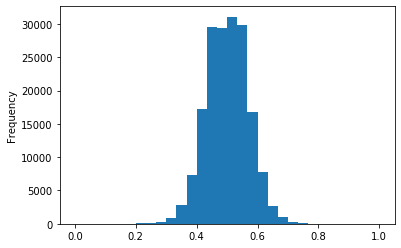

In [64]:
matches['points_won'] = matches.service_points_won + matches.return_points_won
matches['points_won_percentage'] = matches.points_won / matches.points

matches['opponent_points_won'] = matches.opponent_service_points_won + matches.opponent_return_points_won
matches['opponent_points_won_percentage'] = matches.opponent_points_won / matches.points

matches.points_won_percentage.plot(kind='hist', bins=30)

# I don't know what I expected.gif
matches.points_won_percentage.mean(), matches.points_won_percentage.min(), matches.points_won_percentage.max()

(0.07183852193008237, 0.05813953488372093, 0.0, 0.75)

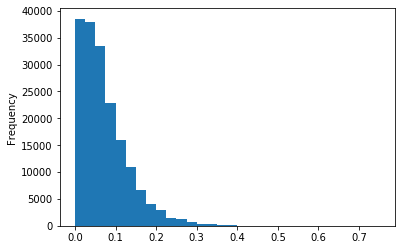

In [65]:
matches['ace_rate'] = matches.aces / matches.service_points
matches['opponent_ace_rate'] = matches.opponent_aces / matches.opponent_service_points

matches.ace_rate.plot(kind='hist', bins=30)

(matches.ace_rate.mean(), matches.ace_rate.median(),
 matches.ace_rate.min(), matches.ace_rate.max())

(0.03945293499250097, 0.034722222222222224, 0.0, 0.6666666666666666)

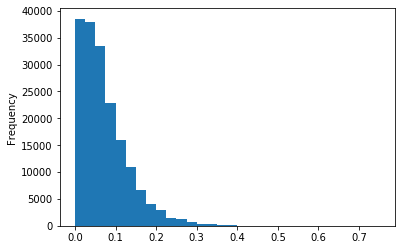

In [66]:
matches['double_fault_rate'] = matches.double_faults / matches.service_points
matches['opponent_double_fault_rate'] = matches.opponent_double_faults / matches.opponent_service_points

matches.ace_rate.plot(kind='hist', bins=30)

(matches.double_fault_rate.mean(), matches.double_fault_rate.median(),
 matches.double_fault_rate.min(), matches.double_fault_rate.max())

(0.0364900148500949, 0.03225806451612903, 0.0, 0.25)

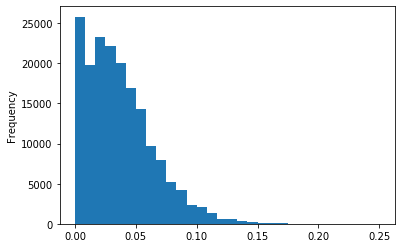

In [67]:
matches['break_rate'] = matches.break_points_won / matches.return_points
matches['opponent_break_rate'] = matches.opponent_break_points_won / matches.opponent_return_points

matches.break_rate.plot(kind='hist', bins=30)

# Initially two data points resulted in a negative percentage, and were corrected. 
(matches.break_rate.mean(), matches.break_rate.median(),
 matches.break_rate.min(), matches.break_rate.max())

(1.5795905617259216, 1.54, 0.15384615384615385, 122.0)

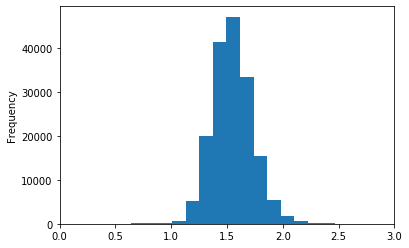

In [68]:
matches['points_per_minute'] = matches.points / matches.minutes

matches.points_per_minute.plot(kind='hist', bins=1000)
plt.xlim(0,3)

# Initially two data points resulted in a negative percentage, and were corrected. 
(matches.points_per_minute.mean(), matches.points_per_minute.median(),
 matches.points_per_minute.min(), matches.points_per_minute.max())

In [69]:
matches.surface = matches.surface.astype('category')
matches.tournament_level = matches.tournament_level.astype('category')
matches.round_of = matches.round_of.astype('category')
matches.result = matches.result.astype('category')

In [70]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 358978 entries, (105453, '2019-M020', 300) to (104755, '2014-D015', 4)
Data columns (total 92 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   tournament_name                                     358978 non-null  object        
 1   surface                                             353704 non-null  category      
 2   draw_size                                           358978 non-null  int64         
 3   tournament_level                                    358978 non-null  category      
 4   tournament_date                                     358978 non-null  datetime64[ns]
 5   player_name                                         358978 non-null  object        
 6   opponent_id                                         358978 non-null  int64         
 7   opponent_name                           

In [71]:
corr = matches.corr()
corr.style.background_gradient(cmap='coolwarm')

In [72]:
matches.to_pickle('../Resources/tennis_clean/atp_top_100_matches.pkl')